In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from desi_retriever.denali import get_specs
from astropy.table import Table, vstack
import matplotlib.cm as cm
import scipy.ndimage as sn

In [3]:
def print_simple_number(truth_table,object_type):
    total_N = len(truth_table)
    good_N = len(truth_table[truth_table['best_quality']>=2.5])
    very_good_N = len(truth_table[truth_table['best_quality']==4])
    tmp_table = truth_table.loc[truth_table['best_quality']>=2.5]
    number_of_consistent_z = len(tmp_table.loc[abs(tmp_table['best_z']-tmp_table['Redrock_z'])/(1+tmp_table['best_z'])<0.0033])
    
    print('Number of',object_type,':',total_N)
    print('Number of ',object_type,'with quality>=2.5:',good_N, ' | fration=',good_N*1.0/total_N)
    print('Number of ',object_type,'with quality==4:',very_good_N, ' | fration=',very_good_N*1.0/total_N)
    print('Number of ',object_type,'with consistent z (with quality>=2.5):',number_of_consistent_z, '| fraction=',number_of_consistent_z/total_N)
   
    number_star = len(tmp_table.loc[tmp_table['best_spectype']=='STAR'])
    number_galaxy = len(tmp_table.loc[tmp_table['best_spectype']=='GALAXY'])
    number_qso = len(tmp_table.loc[tmp_table['best_spectype']=='QSO'])
    print('---------')  
    print('Fraction of objects with quality>=2.5')
    print('Star:',number_star*1.0/good_N)
    print('Galaxy:',number_galaxy*1.0/good_N)    
    print('QSO:',number_qso*1.0/good_N)

    plt.hist(truth_table['best_quality'],bins=8,range=(0,4))
    plt.ylabel('Number')
    plt.xlabel('Quality')
    plt.yscale('log')
    plt.xlim(0,4)
  

In [4]:
def plot_redshift_distribution(truth_table,object_type):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    x_range = [0,max(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'])]
    plt.hist(truth_table['best_z'],range=(x_range[0],x_range[1]),bins=20,color='b',label='All')
    plt.hist(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'],range=(x_range[0],x_range[1]),bins=20,color='orange',label='quality>=2.5')
    plt.hist(truth_table.loc[truth_table['best_quality']==4]['best_z'],range=(x_range[0],x_range[1]),bins=20,color='g',label='quality=4')
    plt.yscale('log')
    plt.xlabel('Best z')
    plt.ylabel('Number')
    plt.legend()
    plt.title(object_type)
    
    plt.subplot(1,2,2)
    plt.scatter(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'],truth_table.loc[truth_table['best_quality']>=2.5]['Redrock_z'],
                
                c=truth_table.loc[truth_table['best_quality']>=2.5]['best_quality'],cmap=cm.jet)
    plt.xlabel('Best z')
    plt.ylabel('Redrock z')
    plt.colorbar()

In [5]:
def plot_chi2_quality_distribution(truth_table):
    #plt.scatter(truth_table['best_quality'],truth_table['DELTACHI2'])
    #plt.ylim(1,100000)
    #plt.yscale('log')
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.hist(np.log10(truth_table['DELTACHI2']),label='All',bins=8,range=(0,5),color='b')
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']>=2.5]['DELTACHI2']),color='orange',label='flag>=2.5',bins=8,range=(0,5))
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']==4]['DELTACHI2']),color='g',label='flag=4',bins=8,range=(0,5),)
    plt.xlabel('$log_{10}$ delta chi$^{2}$')
    plt.ylabel('Number')
    plt.yscale('log')
    plt.legend()
    plt.subplot(1,2,2)
    
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']<2.5]['DELTACHI2']),color='grey',label='flag<2.5',bins=8,range=(0,5),histtype='step',lw=4)
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']>=2.5]['DELTACHI2']),color='orange',label='flag>=2.5',bins=8,range=(0,5),histtype='step',lw=4)
    #plt.hist(np.log10(truth_table.loc[truth_table['best_quality']==4]['DELTACHI2']),color='g',label='flag=4',bins=8,range=(0,5),histtype='step',lw=4)

    plt.xlabel('$log_{10}$ delta chi$^{2}$')
    plt.ylabel('Number')
    plt.yscale('log')
    plt.legend()    
    
    
    
    

In [6]:
def give_me_ra_dec_object_with_property_cut(truth_table, property_name, cut, if_print=True):
    tmp_table = truth_table.loc[(truth_table[property_name]>=cut[0]) & (truth_table[property_name]<cut[1])]
    if if_print==True:
        for i_object in range(0,len(tmp_table)):
            print(tmp_table['TARGET_RA'].values[i_object],tmp_table['TARGET_DEC'].values[i_object])
    
    return tmp_table

In [7]:
# The filenames are tentative. We will change the filenames.
on_nersc=False
if on_nersc==True:
    dir = '/global/cfs/cdirs/desi/sv/vi/TruthTables/Cascades/'
    ELG = pd.read_csv(dir+'ELG/'+'desi-vi_SV_cascades_combination_ELG_all_210521.csv')
    ELG['DELTACHI2']=ELG['Redrock_deltachi2']
    #ELG_80606 = pd.read_csv(dir+'ELG/'+'desi-vi_ELG_tile80606_nightdeep_merged_all_210218.csv')
    
ELG = pd.read_csv('/Users/blue/Dropbox/Astro_Research/Projects_plots_notes/2020_DESI_visual_inspect/SV_VI_cascades/Cascades/ELG/output/desi-vi_SV_cascades_combination_ELG_all_210521.csv')
ELG['DELTACHI2']=ELG['Redrock_deltachi2']

In [9]:
denali_all = Table.read('/Volumes/Elements/DESI/Denali/denali_alltiles_Allzinfo.fits')
denali_all = denali_all[denali_all['coadd_type']=='cumulative']

In [26]:
new_catalog_denali = denali_all['TARGETID','Z','subset','TILEID','DELTACHI2','TARGET_RA','TARGET_DEC','LAST_NIGHT',
                              'EFFTIME_BRIGHT','FIBERFLUX_R','FLUX_R','FIBERFLUX_Z','FLUX_W1','FLUX_G','FLUX_Z','EBV','ZWARN','FIBER'].to_pandas()

In [27]:

#final_match_catalog['Redrock_z']=final_match_catalog['Z']


# ELG selection 0 0.6<z<1.58 short-deep non-repeatable

Number of ELG : 84
Number of  ELG with quality>=2.5: 69  | fration= 0.8214285714285714
Number of  ELG with quality==4: 41  | fration= 0.4880952380952381
Number of  ELG with consistent z (with quality>=2.5): 65 | fraction= 0.7738095238095238
---------
Fraction of objects with quality>=2.5
Star: 0.0
Galaxy: 0.9420289855072463
QSO: 0.057971014492753624


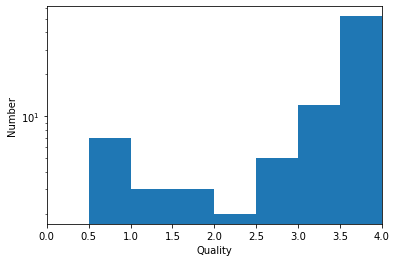

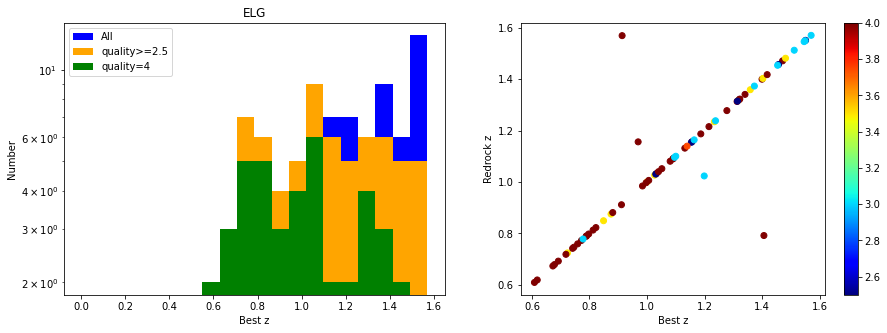

In [28]:
ELG_main = ELG[ELG['setting_name']=='sel0']
print_simple_number(ELG_main,'ELG')
plot_redshift_distribution(ELG_main,'ELG')
#plot_chi2_quality_distribution(ELG_main)

Number of ELG : 84
Number of  ELG with quality>=2.5: 69  | fration= 0.8214285714285714
Number of  ELG with quality==4: 41  | fration= 0.4880952380952381
Number of  ELG with consistent z (with quality>=2.5): 62 | fraction= 0.7380952380952381
---------
Fraction of objects with quality>=2.5
Star: 0.0
Galaxy: 0.9420289855072463
QSO: 0.057971014492753624


<ipython-input-29-079a660c7568>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])
<ipython-input-29-079a660c7568>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match_catalog['Z_cascades']=final_match_catalog['Redrock_z']
<ipython-input-29-079a660c7568>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

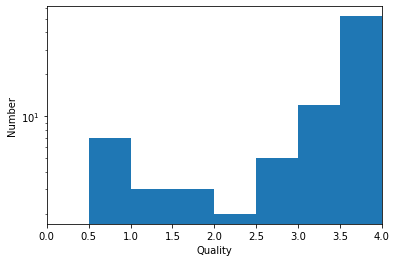

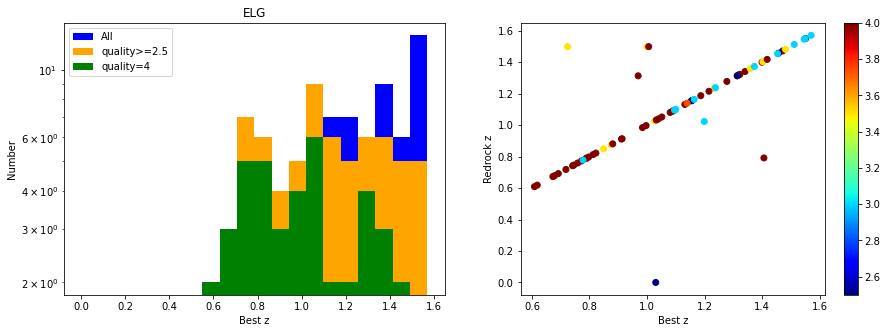

In [29]:
catalog_ELG_match = ELG_main.merge(new_catalog_denali,on='TARGETID',how='left',suffixes=("_cascades","_denali"))
final_match_catalog = catalog_ELG_match[catalog_ELG_match['TILEID_cascades']==catalog_ELG_match['TILEID_denali']]
final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])
final_match_catalog['Z_cascades']=final_match_catalog['Redrock_z']
final_match_catalog['Redrock_z']=final_match_catalog['Z']
print_simple_number(final_match_catalog,'ELG')
plot_redshift_distribution(final_match_catalog,'ELG')

7
7


Text(0, 0.5, 'Best VI redshift')

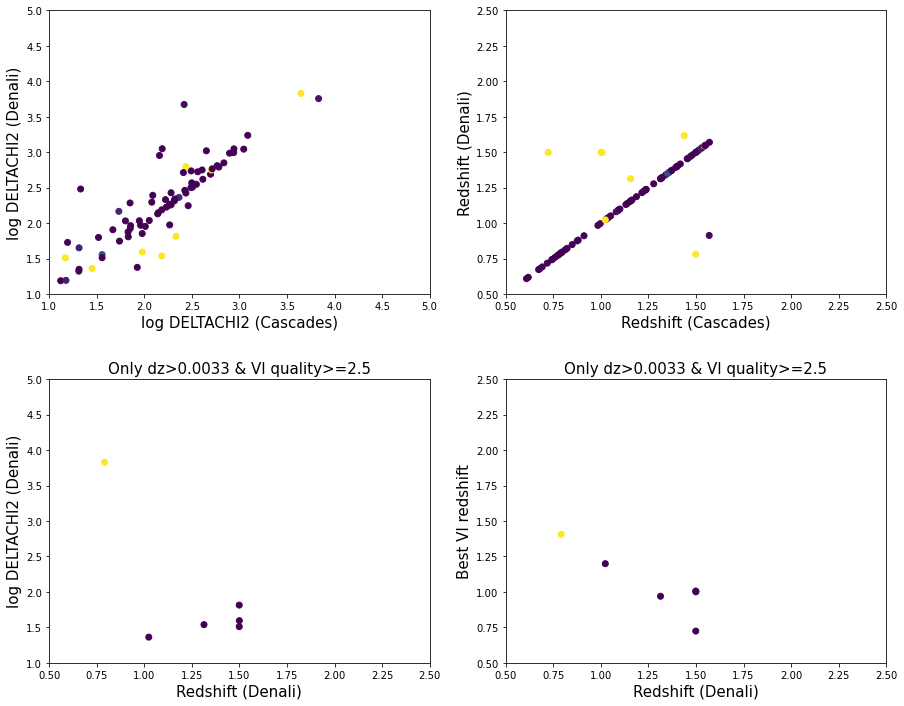

In [30]:
cut_catalog = final_match_catalog[(final_match_catalog['dz']>0.0033) & (final_match_catalog['best_quality']>=2.5)]


plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
plt.scatter(np.log10(final_match_catalog['DELTACHI2_cascades']),np.log10(final_match_catalog['DELTACHI2_denali']),c=final_match_catalog['dz'],vmin=0,vmax=0.0033)
plt.xlim(1,5)
plt.ylim(1,5)
plt.xlabel('log DELTACHI2 (Cascades)',fontsize=15)
plt.ylabel('log DELTACHI2 (Denali)',fontsize=15)
plt.subplot(2,2,2)
plt.scatter(final_match_catalog['Z_cascades'],final_match_catalog['Z'],c=final_match_catalog['dz'],vmin=0,vmax=0.0033)
plt.xlim(0.5,2.5)
plt.ylim(0.5,2.5)
plt.xlabel('Redshift (Cascades)',fontsize=15)
plt.ylabel('Redshift (Denali)',fontsize=15)
plt.subplot(2,2,3)
plt.scatter(cut_catalog['Z'],np.log10(cut_catalog['DELTACHI2_denali']),c=np.log10(cut_catalog['DELTACHI2_denali']),vmin=2,vmax=3)
print(len(cut_catalog['Z']))
plt.xlim(0.5,2.5)
plt.ylim(1,5)
plt.title('Only dz>0.0033 & VI quality>=2.5',fontsize=15)
plt.xlabel('Redshift (Denali)',fontsize=15)
plt.ylabel('log DELTACHI2 (Denali)',fontsize=15)
plt.subplot(2,2,4)
plt.scatter(cut_catalog['Z'],cut_catalog['best_z'],c=np.log10(cut_catalog['DELTACHI2_denali']),vmin=2,vmax=3)
print(len(cut_catalog['Z']))
plt.title('Only dz>0.0033 & VI quality>=2.5',fontsize=15)
plt.xlim(0.5,2.5)
plt.ylim(0.5,2.5)
plt.xlabel('Redshift (Denali)',fontsize=15)
plt.ylabel('Best VI redshift',fontsize=15)

# ELG selection 1 low-z<0.6 short-deep non-repeatable

Number of ELG : 279
Number of  ELG with quality>=2.5: 175  | fration= 0.6272401433691757
Number of  ELG with quality==4: 132  | fration= 0.4731182795698925
Number of  ELG with consistent z (with quality>=2.5): 129 | fraction= 0.46236559139784944
---------
Fraction of objects with quality>=2.5
Star: 0.10857142857142857
Galaxy: 0.8114285714285714
QSO: 0.08


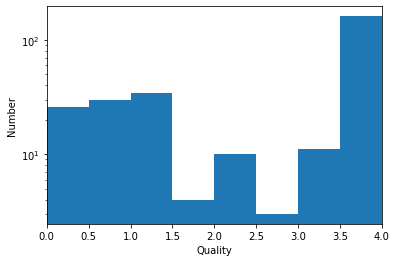

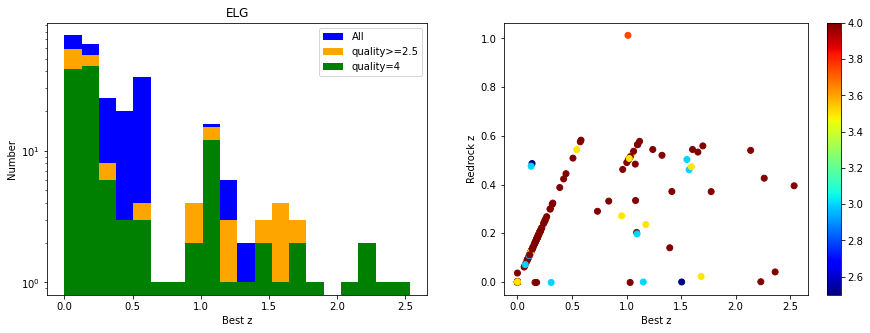

In [31]:
ELG_lowz = ELG[ELG['setting_name']=='sel1']
print_simple_number(ELG_lowz,'ELG')
plot_redshift_distribution(ELG_lowz,'ELG')
#plot_chi2_quality_distribution(ELG_lowz)

Number of ELG : 279
Number of  ELG with quality>=2.5: 175  | fration= 0.6272401433691757
Number of  ELG with quality==4: 132  | fration= 0.4731182795698925
Number of  ELG with consistent z (with quality>=2.5): 123 | fraction= 0.44086021505376344
---------
Fraction of objects with quality>=2.5
Star: 0.10857142857142857
Galaxy: 0.8114285714285714
QSO: 0.08


<ipython-input-32-a5166369a20c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])
<ipython-input-32-a5166369a20c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match_catalog['Z_cascades']=final_match_catalog['Redrock_z']
<ipython-input-32-a5166369a20c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

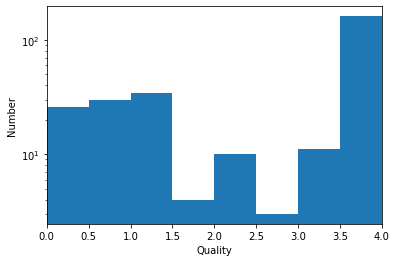

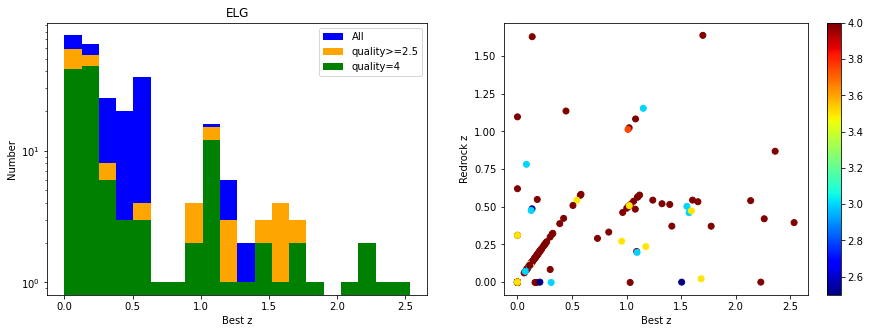

In [32]:
catalog_ELG_match = ELG_lowz.merge(new_catalog_denali,on='TARGETID',how='left',suffixes=("_cascades","_denali"))
final_match_catalog = catalog_ELG_match[catalog_ELG_match['TILEID_cascades']==catalog_ELG_match['TILEID_denali']]
final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])
final_match_catalog['Z_cascades']=final_match_catalog['Redrock_z']
final_match_catalog['Redrock_z']=final_match_catalog['Z']
print_simple_number(final_match_catalog,'ELG')
plot_redshift_distribution(final_match_catalog,'ELG')

52
52


Text(0, 0.5, 'Best VI redshift')

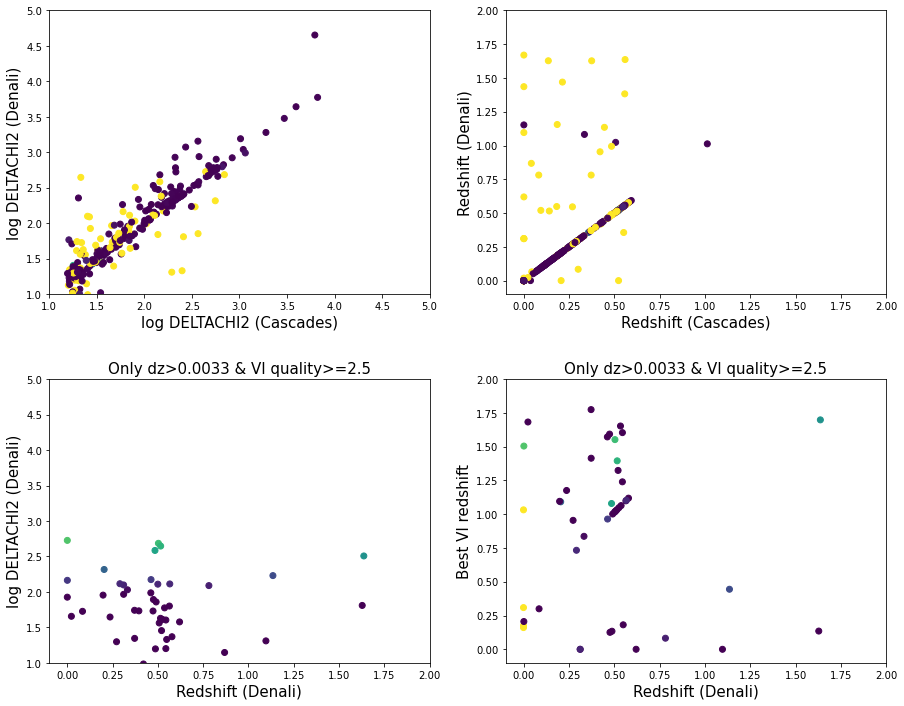

In [33]:
cut_catalog = final_match_catalog[(final_match_catalog['dz']>0.0033) & (final_match_catalog['best_quality']>=2.5)]


plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
plt.scatter(np.log10(final_match_catalog['DELTACHI2_cascades']),np.log10(final_match_catalog['DELTACHI2_denali']),c=final_match_catalog['dz'],vmin=0,vmax=0.0033)
plt.xlim(1,5)
plt.ylim(1,5)
plt.xlabel('log DELTACHI2 (Cascades)',fontsize=15)
plt.ylabel('log DELTACHI2 (Denali)',fontsize=15)
plt.subplot(2,2,2)
plt.scatter(final_match_catalog['Z_cascades'],final_match_catalog['Z'],c=final_match_catalog['dz'],vmin=0,vmax=0.0033)
plt.xlim(-0.1,2)
plt.ylim(-0.1,2)
plt.xlabel('Redshift (Cascades)',fontsize=15)
plt.ylabel('Redshift (Denali)',fontsize=15)
plt.subplot(2,2,3)
plt.scatter(cut_catalog['Z'],np.log10(cut_catalog['DELTACHI2_denali']),c=np.log10(cut_catalog['DELTACHI2_denali']),vmin=2,vmax=3)
print(len(cut_catalog['Z']))
plt.xlim(-0.1,2)
plt.ylim(1,5)
plt.title('Only dz>0.0033 & VI quality>=2.5',fontsize=15)
plt.xlabel('Redshift (Denali)',fontsize=15)
plt.ylabel('log DELTACHI2 (Denali)',fontsize=15)
plt.subplot(2,2,4)
plt.scatter(cut_catalog['Z'],cut_catalog['best_z'],c=np.log10(cut_catalog['DELTACHI2_denali']),vmin=2,vmax=3)
print(len(cut_catalog['Z']))
plt.title('Only dz>0.0033 & VI quality>=2.5',fontsize=15)
plt.xlim(-0.1,2)
plt.ylim(-0.1,2)
plt.xlabel('Redshift (Denali)',fontsize=15)
plt.ylabel('Best VI redshift',fontsize=15)

# ELG selection 2 high-z >1.635 short-deep non-repeatable

Number of ELG : 377
Number of  ELG with quality>=2.5: 343  | fration= 0.9098143236074271
Number of  ELG with quality==4: 267  | fration= 0.7082228116710876
Number of  ELG with consistent z (with quality>=2.5): 261 | fraction= 0.6923076923076923
---------
Fraction of objects with quality>=2.5
Star: 0.011661807580174927
Galaxy: 0.09037900874635568
QSO: 0.8979591836734694


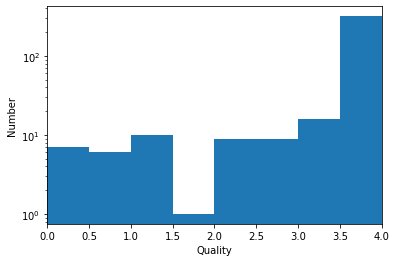

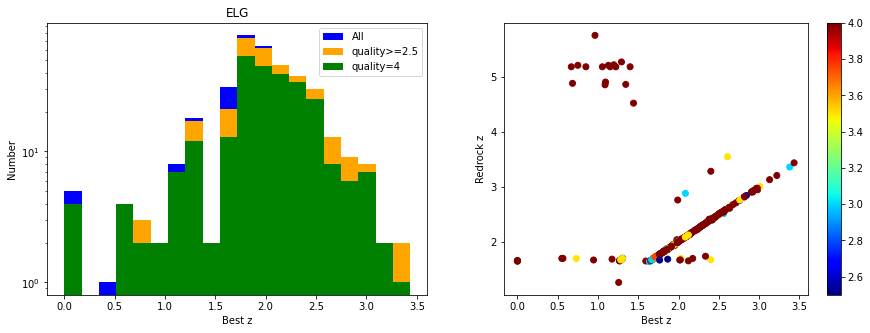

In [34]:
ELG_highz_16 = ELG[ELG['setting_name']=='sel2']
print_simple_number(ELG_highz_16,'ELG')
plot_redshift_distribution(ELG_highz_16,'ELG')
#plot_chi2_quality_distribution(ELG_highz_16)

<ipython-input-35-d7b942c51a81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])
<ipython-input-35-d7b942c51a81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match_catalog['Z_cascades']=final_match_catalog['Redrock_z']
<ipython-input-35-d7b942c51a81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Number of ELG : 377
Number of  ELG with quality>=2.5: 343  | fration= 0.9098143236074271
Number of  ELG with quality==4: 267  | fration= 0.7082228116710876
Number of  ELG with consistent z (with quality>=2.5): 254 | fraction= 0.6737400530503979
---------
Fraction of objects with quality>=2.5
Star: 0.011661807580174927
Galaxy: 0.09037900874635568
QSO: 0.8979591836734694


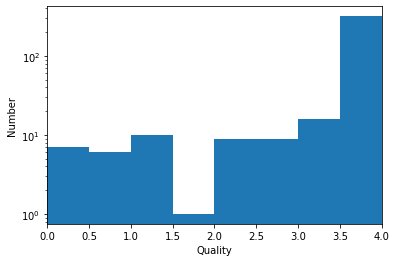

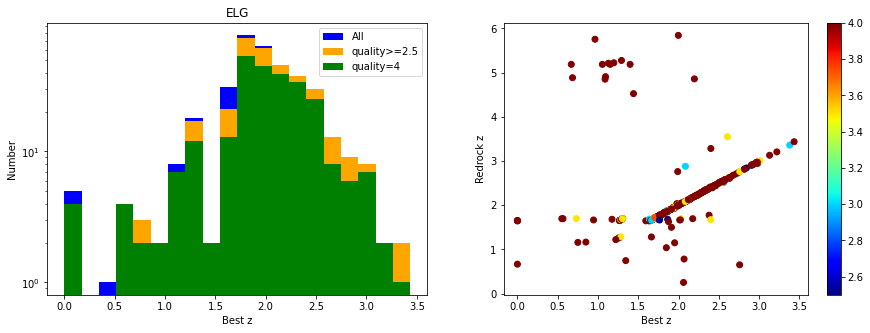

In [35]:
catalog_ELG_match = ELG_highz_16.merge(new_catalog_denali,on='TARGETID',how='left',suffixes=("_cascades","_denali"))
final_match_catalog = catalog_ELG_match[catalog_ELG_match['TILEID_cascades']==catalog_ELG_match['TILEID_denali']]
final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])
final_match_catalog['Z_cascades']=final_match_catalog['Redrock_z']
final_match_catalog['Redrock_z']=final_match_catalog['Z']
print_simple_number(final_match_catalog,'ELG')
plot_redshift_distribution(final_match_catalog,'ELG')

89
89


Text(0, 0.5, 'Best VI redshift')

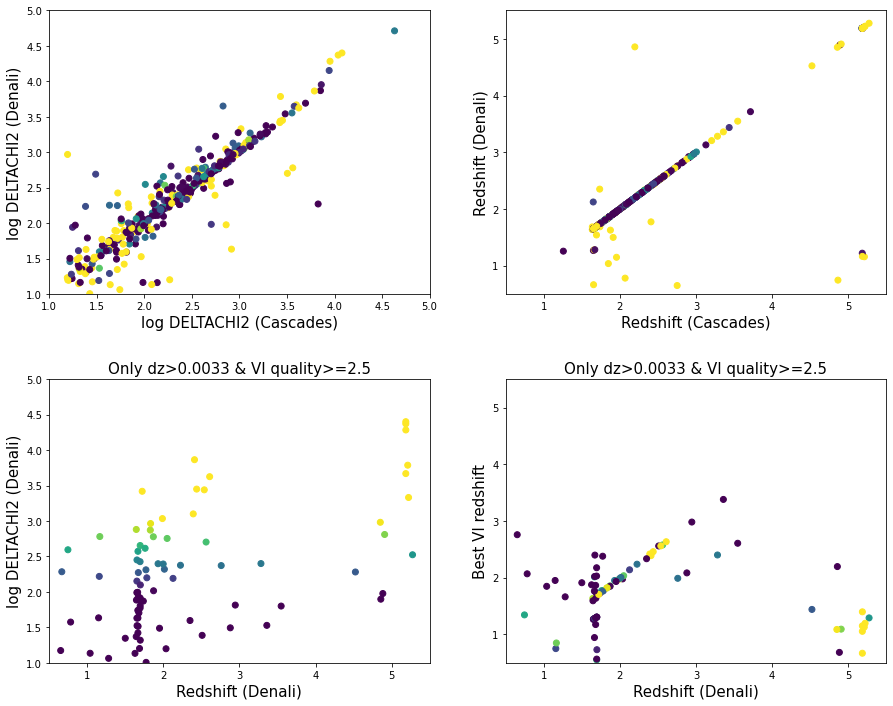

In [36]:
cut_catalog = final_match_catalog[(final_match_catalog['dz']>0.0033) & (final_match_catalog['best_quality']>=2.5)]


plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
plt.scatter(np.log10(final_match_catalog['DELTACHI2_cascades']),np.log10(final_match_catalog['DELTACHI2_denali']),c=final_match_catalog['dz'],vmin=0,vmax=0.0033)
plt.xlim(1,5)
plt.ylim(1,5)
plt.xlabel('log DELTACHI2 (Cascades)',fontsize=15)
plt.ylabel('log DELTACHI2 (Denali)',fontsize=15)
plt.subplot(2,2,2)
plt.scatter(final_match_catalog['Z_cascades'],final_match_catalog['Z'],c=final_match_catalog['dz'],vmin=0,vmax=0.0033)
plt.xlim(0.5,5.5)
plt.ylim(0.5,5.5)
plt.xlabel('Redshift (Cascades)',fontsize=15)
plt.ylabel('Redshift (Denali)',fontsize=15)
plt.subplot(2,2,3)
plt.scatter(cut_catalog['Z'],np.log10(cut_catalog['DELTACHI2_denali']),c=np.log10(cut_catalog['DELTACHI2_denali']),vmin=2,vmax=3)
print(len(cut_catalog['Z']))
plt.xlim(0.5,5.5)
plt.ylim(1,5)
plt.title('Only dz>0.0033 & VI quality>=2.5',fontsize=15)
plt.xlabel('Redshift (Denali)',fontsize=15)
plt.ylabel('log DELTACHI2 (Denali)',fontsize=15)
plt.subplot(2,2,4)
plt.scatter(cut_catalog['Z'],cut_catalog['best_z'],c=np.log10(cut_catalog['DELTACHI2_denali']),vmin=2,vmax=3)
print(len(cut_catalog['Z']))
plt.title('Only dz>0.0033 & VI quality>=2.5',fontsize=15)
plt.xlim(0.5,5.5)
plt.ylim(0.5,5.5)
plt.xlabel('Redshift (Denali)',fontsize=15)
plt.ylabel('Best VI redshift',fontsize=15)

# ELG selection 3 high-z short-deep non-repeatable

Number of ELG : 266
Number of  ELG with quality>=2.5: 150  | fration= 0.5639097744360902
Number of  ELG with quality==4: 69  | fration= 0.2593984962406015
Number of  ELG with consistent z (with quality>=2.5): 129 | fraction= 0.4849624060150376
---------
Fraction of objects with quality>=2.5
Star: 0.013333333333333334
Galaxy: 0.84
QSO: 0.14666666666666667


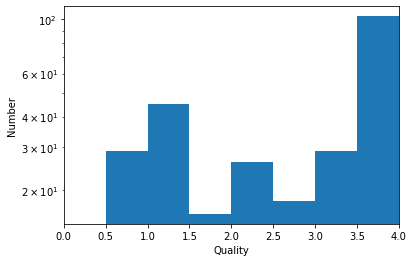

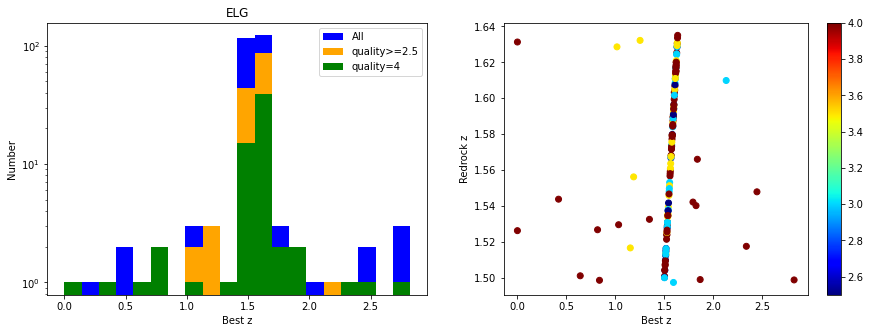

In [37]:
ELG_highz_inconsistent = ELG[ELG['setting_name']=='sel3']
print_simple_number(ELG_highz_inconsistent,'ELG')
plot_redshift_distribution(ELG_highz_inconsistent,'ELG')
#plot_chi2_quality_distribution(ELG_highz_inconsistent)

<ipython-input-38-5ca17992c25d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])
<ipython-input-38-5ca17992c25d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match_catalog['Z_cascades']=final_match_catalog['Redrock_z']
<ipython-input-38-5ca17992c25d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Number of ELG : 266
Number of  ELG with quality>=2.5: 150  | fration= 0.5639097744360902
Number of  ELG with quality==4: 69  | fration= 0.2593984962406015
Number of  ELG with consistent z (with quality>=2.5): 136 | fraction= 0.5112781954887218
---------
Fraction of objects with quality>=2.5
Star: 0.013333333333333334
Galaxy: 0.84
QSO: 0.14666666666666667


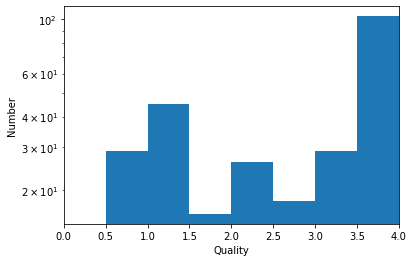

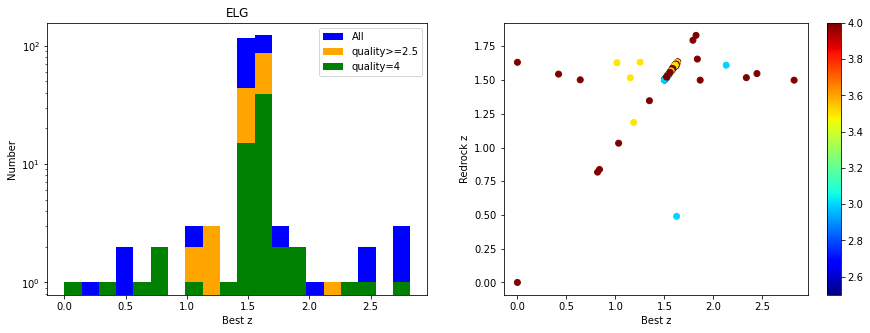

In [38]:
catalog_ELG_match = ELG_highz_inconsistent.merge(new_catalog_denali,on='TARGETID',how='left',suffixes=("_cascades","_denali"))
final_match_catalog = catalog_ELG_match[catalog_ELG_match['TILEID_cascades']==catalog_ELG_match['TILEID_denali']]
final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])
final_match_catalog['Z_cascades']=final_match_catalog['Redrock_z']
final_match_catalog['Redrock_z']=final_match_catalog['Z']
print_simple_number(final_match_catalog,'ELG')
plot_redshift_distribution(final_match_catalog,'ELG')

14
14


Text(0, 0.5, 'Best VI redshift')

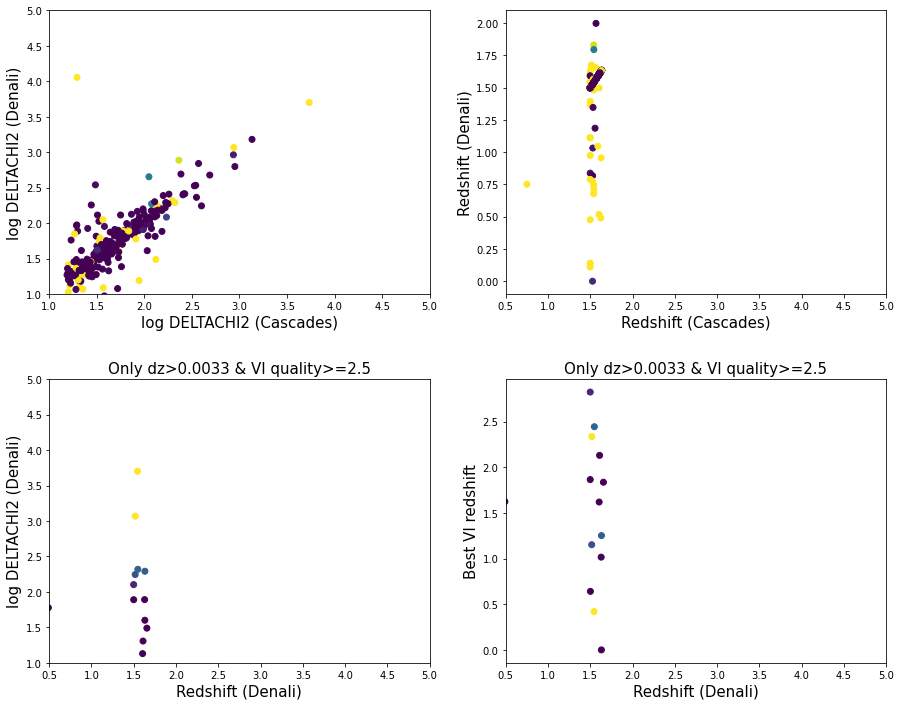

In [39]:
cut_catalog = final_match_catalog[(final_match_catalog['dz']>0.0033) & (final_match_catalog['best_quality']>=2.5)]


plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
plt.scatter(np.log10(final_match_catalog['DELTACHI2_cascades']),np.log10(final_match_catalog['DELTACHI2_denali']),c=final_match_catalog['dz'],vmin=0,vmax=0.0033)
plt.xlim(1,5)
plt.ylim(1,5)
plt.xlabel('log DELTACHI2 (Cascades)',fontsize=15)
plt.ylabel('log DELTACHI2 (Denali)',fontsize=15)
plt.subplot(2,2,2)
plt.scatter(final_match_catalog['Z_cascades'],final_match_catalog['Z'],c=final_match_catalog['dz'],vmin=0,vmax=0.0033)
plt.xlim(0.5,5)
plt.xlim(0.5,5)
plt.xlabel('Redshift (Cascades)',fontsize=15)
plt.ylabel('Redshift (Denali)',fontsize=15)
plt.subplot(2,2,3)
plt.scatter(cut_catalog['Z'],np.log10(cut_catalog['DELTACHI2_denali']),c=np.log10(cut_catalog['DELTACHI2_denali']),vmin=2,vmax=3)
print(len(cut_catalog['Z']))
plt.xlim(0.5,5)
plt.ylim(1,5)
plt.title('Only dz>0.0033 & VI quality>=2.5',fontsize=15)
plt.xlabel('Redshift (Denali)',fontsize=15)
plt.ylabel('log DELTACHI2 (Denali)',fontsize=15)
plt.subplot(2,2,4)
plt.scatter(cut_catalog['Z'],cut_catalog['best_z'],c=np.log10(cut_catalog['DELTACHI2_denali']),vmin=2,vmax=3)
print(len(cut_catalog['Z']))
plt.title('Only dz>0.0033 & VI quality>=2.5',fontsize=15)
plt.xlim(0.5,5)
plt.xlim(0.5,5)
plt.xlabel('Redshift (Denali)',fontsize=15)
plt.ylabel('Best VI redshift',fontsize=15)

# ELG selection 4 high-z combined deltach2

Number of ELG : 368
Number of  ELG with quality>=2.5: 356  | fration= 0.967391304347826
Number of  ELG with quality==4: 171  | fration= 0.46467391304347827
Number of  ELG with consistent z (with quality>=2.5): 352 | fraction= 0.9565217391304348
---------
Fraction of objects with quality>=2.5
Star: 0.0
Galaxy: 0.9831460674157303
QSO: 0.016853932584269662


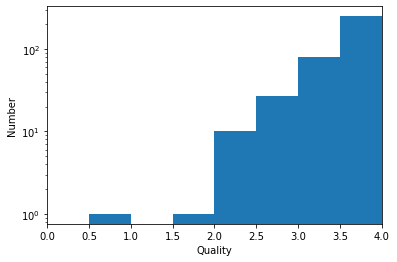

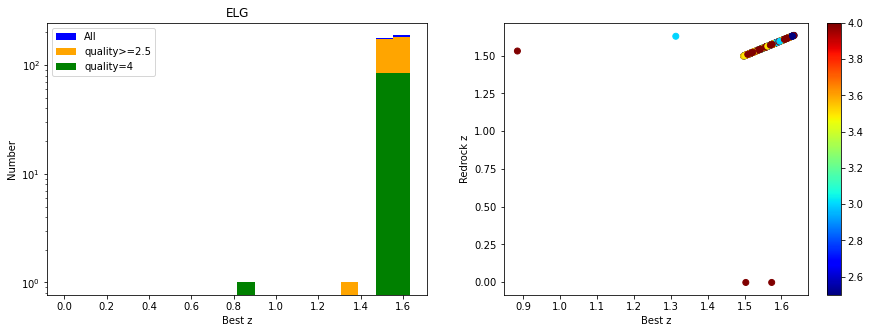

In [40]:
#ELG = pd.read_csv('desi-vi_ELG_tile80608_nightdeep_merged_all_210203.csv')
ELG_highz = ELG[ELG['setting_name']=='sel4']
print_simple_number(ELG_highz,'ELG')
plot_redshift_distribution(ELG_highz,'ELG')
#plot_chi2_quality_distribution(ELG_highz)

<ipython-input-41-86872f80a1e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])
<ipython-input-41-86872f80a1e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match_catalog['Z_cascades']=final_match_catalog['Redrock_z']
<ipython-input-41-86872f80a1e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Number of ELG : 368
Number of  ELG with quality>=2.5: 356  | fration= 0.967391304347826
Number of  ELG with quality==4: 171  | fration= 0.46467391304347827
Number of  ELG with consistent z (with quality>=2.5): 349 | fraction= 0.9483695652173914
---------
Fraction of objects with quality>=2.5
Star: 0.0
Galaxy: 0.9831460674157303
QSO: 0.016853932584269662


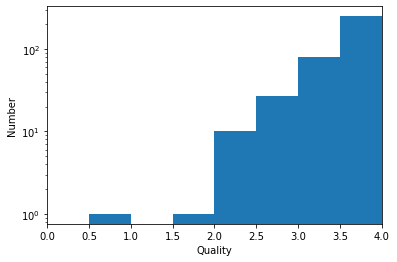

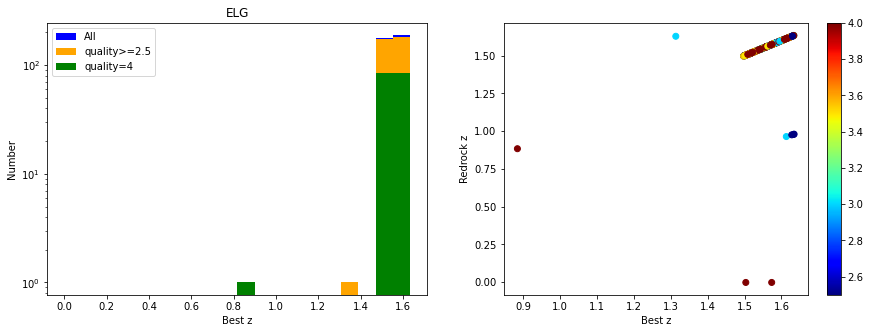

In [41]:
catalog_ELG_match = ELG_highz.merge(new_catalog_denali,on='TARGETID',how='left',suffixes=("_cascades","_denali"))
final_match_catalog = catalog_ELG_match[catalog_ELG_match['TILEID_cascades']==catalog_ELG_match['TILEID_denali']]
final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])
final_match_catalog['Z_cascades']=final_match_catalog['Redrock_z']
final_match_catalog['Redrock_z']=final_match_catalog['Z']
print_simple_number(final_match_catalog,'ELG')
plot_redshift_distribution(final_match_catalog,'ELG')

7
7


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Best VI redshift')

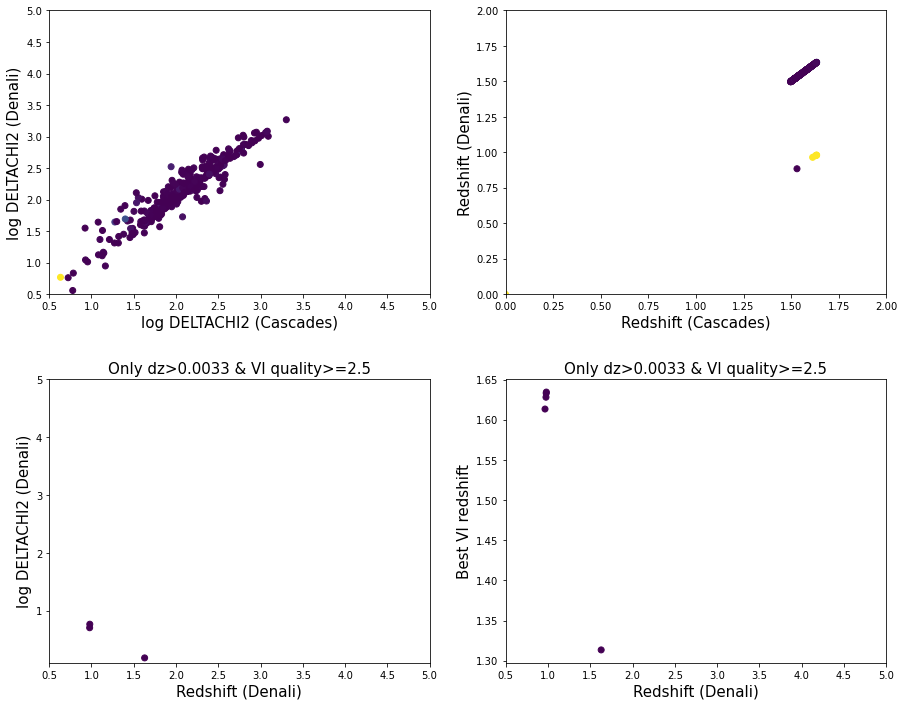

In [42]:
cut_catalog = final_match_catalog[(final_match_catalog['dz']>0.0033) & (final_match_catalog['best_quality']>=2.5)]


plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
plt.scatter(np.log10(final_match_catalog['DELTACHI2_cascades']),np.log10(final_match_catalog['DELTACHI2_denali']),c=final_match_catalog['dz'],vmin=0,vmax=0.0033)
plt.xlim(0.5,5)
plt.ylim(0.5,5)
plt.xlabel('log DELTACHI2 (Cascades)',fontsize=15)
plt.ylabel('log DELTACHI2 (Denali)',fontsize=15)
plt.subplot(2,2,2)
plt.scatter(final_match_catalog['Z_cascades'],final_match_catalog['Z'],c=final_match_catalog['dz'],vmin=0,vmax=0.0033)
plt.ylim(0,2)
plt.xlim(0,2)
plt.xlabel('Redshift (Cascades)',fontsize=15)
plt.ylabel('Redshift (Denali)',fontsize=15)
plt.subplot(2,2,3)
plt.scatter(cut_catalog['Z'],np.log10(cut_catalog['DELTACHI2_denali']),c=np.log10(cut_catalog['DELTACHI2_denali']),vmin=2,vmax=3)
print(len(cut_catalog['Z']))
plt.xlim(0.5,5)
plt.ylim(0.1,5)
plt.title('Only dz>0.0033 & VI quality>=2.5',fontsize=15)
plt.xlabel('Redshift (Denali)',fontsize=15)
plt.ylabel('log DELTACHI2 (Denali)',fontsize=15)
plt.subplot(2,2,4)
plt.scatter(cut_catalog['Z'],cut_catalog['best_z'],c=np.log10(cut_catalog['DELTACHI2_denali']),vmin=2,vmax=3)
print(len(cut_catalog['Z']))
plt.title('Only dz>0.0033 & VI quality>=2.5',fontsize=15)
plt.xlim(0.5,5)
plt.xlim(0.5,5)
plt.xlabel('Redshift (Denali)',fontsize=15)
plt.ylabel('Best VI redshift',fontsize=15)